<a href="https://colab.research.google.com/github/JackKellar/Projects/blob/main/Remote_sensing_with_rasterio_and_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
satelites= ['Landsat', 'CBERS', 'Aqua', "Terra", 'Sentinel']

In [ ]:
for satelite in satelites:
  print(satelites.reverse())

None
None
None
None
None


In [ ]:
from google.colab import files

data = files.upload()

Saving recorte.tif to recorte.tif


In [ ]:
!pip install rasterio -q
import rasterio as rio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 46.9 MB/s eta 0:00:00


In [ ]:
sentinel = rio.open("/content/recorte.tif")

In [ ]:
sentinel.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 310,
 'height': 254,
 'count': 10,
 'crs': CRS.from_epsg(32722),
 'transform': Affine(20.0, 0.0, 743460.0,
        0.0, -20.0, 7460220.0)}

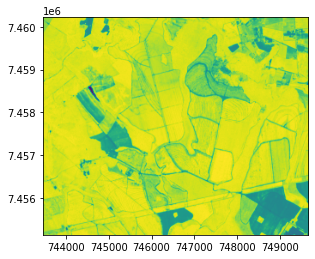

In [ ]:
from rasterio.plot import show

show(sentinel.read(10), transform = sentinel.transform) 

<function matplotlib.pyplot.show(*args, **kw)>

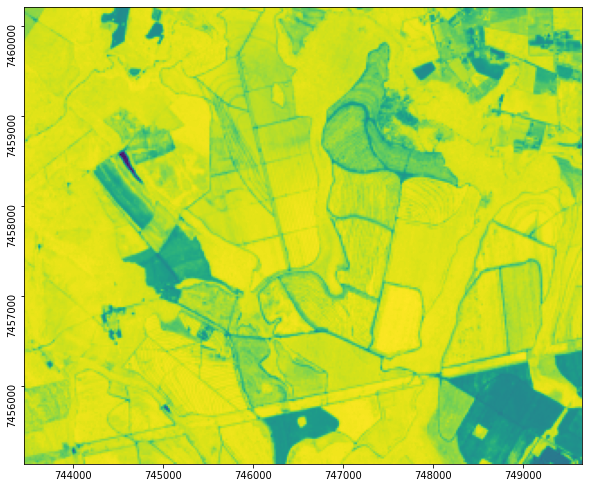

In [ ]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,10))
show(sentinel.read(10),ax=ax, transform=sentinel.transform)
ax.ticklabel_format(useOffset=False, style='plain')
plt.yticks(rotation=90)
plt.show

In [ ]:
#banda Near Infrared 8
nir= sentinel.read(8)
#banda Vermelha 4
red= sentinel.read(4)

In [ ]:
nir

array([[1587., 1595., 1611., ...,  712.,  633.,  504.],
       [1572., 1595., 1616., ...,  738.,  644.,  496.],
       [1640., 1618., 1619., ...,  730.,  674.,  536.],
       ...,
       [1669., 1754., 1796., ..., 1566., 1935., 1313.],
       [1725., 1744., 1718., ..., 1184., 1665., 1682.],
       [1615., 1619., 1585., ..., 1104., 1345., 1638.]], dtype=float32)

In [ ]:
#saúde de vegetação
ndvi=(nir-red)/(nir+red)
ndvi

array([[ 0.11017838,  0.11111111,  0.10418095, ..., -0.01793103,
        -0.08127721, -0.15008432],
       [ 0.112133  ,  0.10725442,  0.10571331, ..., -0.01336898,
        -0.07934239, -0.15358362],
       [ 0.12021858,  0.11817554,  0.11848014, ..., -0.02731512,
        -0.056683  , -0.12916328],
       ...,
       [ 0.09120627,  0.0972787 ,  0.0944546 , ...,  0.05561173,
         0.16181327,  0.07096248],
       [ 0.09177215,  0.08829954,  0.09811442, ...,  0.1406551 ,
         0.08965968,  0.03126916],
       [ 0.08864173,  0.09097035,  0.0885989 , ...,  0.07184466,
        -0.00296516,  0.01204819]], dtype=float32)

<function matplotlib.pyplot.show(*args, **kw)>

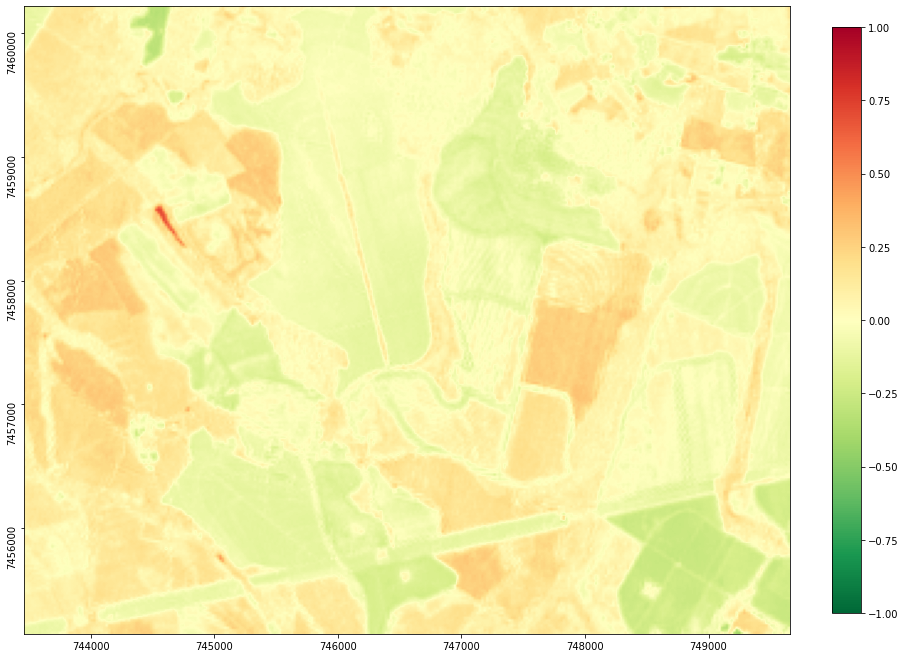

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
show(-ndvi, ax=ax, transform=sentinel.transform, cmap='RdYlGn_r', vmin=-1, vmax=1)
ax.ticklabel_format(useOffset=False, style='plain')
plt.yticks(rotation=90)
im=ax.get_images()[0]
fig.colorbar(im, ax=ax, fraction=0.035)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

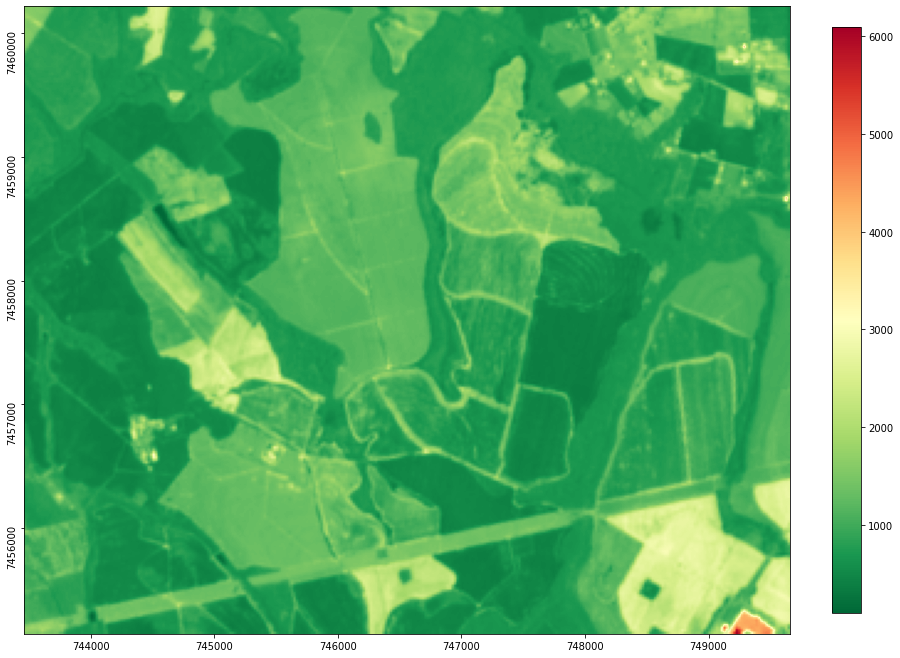

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
show(nir, ax=ax, transform=sentinel.transform, cmap='RdYlGn_r')#, vmin=0, vmax=6900)
ax.ticklabel_format(useOffset=False, style='plain')
plt.yticks(rotation=90)
im=ax.get_images()[0]
fig.colorbar(im, ax=ax, fraction=0.035)
plt.show

In [ ]:
!pip install geemap -q
!pip install geopandas==0.12.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import ee
import geemap 
import geopandas as gpd
import numpy as np

In [ ]:
ee.Authenticate()
ee.Initialize

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=3QzzPuqnFzTx-Wa_FZgtpzEJ_frw2a58tNeuQJ-R-fk&tc=6fg4CQSNKysxfIdjn4pZ6zQkO371uT4i-sYdPgsK4mE&cc=gmSDNnOhJuwvzuOem0QreHzz_8G1ZS-KgYcRHMOlJN0

The authorization workflow will generate a code, which you should paste in the box below.


KeyboardInterrupt: ignored

In [ ]:
!pip install geobr -q
import geobr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.1/928.1 KB 45.4 MB/s eta 0:00:00


In [ ]:
geobr.lookup_muni('Porto Alegre')

,code_muni,name_muni,code_state,name_state,abbrev_state,code_micro,name_micro,code_meso,name_meso,code_immediate,name_immediate,code_intermediate,name_intermediate
4927,4314902,Porto Alegre,43,Rio Grande do Sul,RS,43026,Porto Alegre,4305,Metropolitana de Porto Alegre,430001,Porto Alegre,4301,Porto Alegre


In [ ]:
poa = geobr.read_municipality(code_muni=4314902, year=2020)
poa.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
325,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul,"MULTIPOLYGON (((-51.16347 -30.26269, -51.16237..."


In [ ]:
poa.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
poa= poa.to_crs('epsg:4326')

In [ ]:
poa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

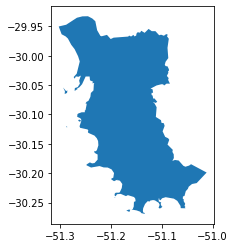

In [ ]:
poa.plot()

In [ ]:
poa.centroid.x[325]

<ipython-input-24-04a56c75c38e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  poa.centroid.x[325]


-51.16456210970536

In [ ]:
cx= poa.centroid.x[325]
cy= poa.centroid.y[325]

<ipython-input-25-9f775087154f>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cx= poa.centroid.x[325]
<ipython-input-25-9f775087154f>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cy= poa.centroid.y[325]


In [ ]:
print(cx)
print(cy)

-51.16456210970536
-30.095389676807578


In [ ]:
image= ee.ImageCollection('LANDSAT/LC09/C02/T1_L2').filterDate('2021-09-27', '2023-02-02')

EEException: ignored

In [ ]:
map= geemap.Map(center=[cy,cx], zoom=10)
landsat_vis= {'bands':['SR_B4', 'SR_B2', 'SR_B1'],
              'gamma': 1.4}

map.addLayer(image, landsat_vis, 'LANDSAT/LC09/C02/T1_L2', True, 1)
map

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=1nI-TMrwodlxKIhAgUSsdOikFn3MRmBhqJdf0iayypY&tc=4iZSmB5ezStPAtRCCkjctCsoZswONdAvJ_1wantJeq4&cc=GIApzpS8hAdbHHxh0tabIuq6ejM36_1MxBUtNqF3l_c

The authorization workflow will generate a code, which you should paste in the box below.


KeyboardInterrupt: ignored

In [ ]:
image= image.filter('CLOUD_COVER <5')

image.size().getInfo()

NameError: ignored

In [ ]:
map= geemap.Map(center=[cy,cx], zoom=10)
landsat_vis= {'bands':['SR_B6', 'SR_B5', 'SR_B1'],
              'gamma': 1.4}

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=yl92bSJkhnACprvzHceN98AkdCW_btj2hIHN4UXFdTs&tc=p-Ng3L0wxXNVIONlX-dI9Ov80BAQV7_alCANSS4s2_s&cc=n93yQb7BNJB8ar4ILOg2ZWTmFbCjwYdzhviUsBaS4QA

The authorization workflow will generate a code, which you should paste in the box below.


KeyboardInterrupt: ignored

In [ ]:
from shapely.geometry import mapping 

In [ ]:
coords= mapping(poa.geometry)

In [ ]:
coords

{'type': 'FeatureCollection',
 'features': [{'id': '325',
   'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [(((-51.163468117, -30.262687481999997),
       (-51.162365444, -30.26221980600001),
       (-51.16410364299999, -30.26601468100001),
       (-51.17019545299999, -30.263662297),
       (-51.164048794, -30.26169945500001),
       (-51.163468117, -30.262687481999997)),),
     (((-51.191845573, -30.241221866000007),
       (-51.192138708, -30.241874696999993),
       (-51.193339523, -30.24215024699999),
       (-51.193470405999996, -30.241379425000005),
       (-51.191845573, -30.241221866000007)),),
     (((-51.286518324, -30.121867010000006),
       (-51.288329251, -30.121440631999995),
       (-51.288304792, -30.120537237999997),
       (-51.286936704999995, -30.120204586),
       (-51.286518324, -30.121867010000006)),),
     (((-51.288682291, -30.060172216000012),
       (-51.28611690799999, -30.058964085000007),
       (-51.28

In [ ]:
coords.keys()

dict_keys(['type', 'features', 'bbox'])

In [ ]:
cds= coords.get('features')[0]

In [ ]:
cds

{'id': '325',
 'type': 'Feature',
 'properties': {},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [(((-51.163468117, -30.262687481999997),
     (-51.162365444, -30.26221980600001),
     (-51.16410364299999, -30.26601468100001),
     (-51.17019545299999, -30.263662297),
     (-51.164048794, -30.26169945500001),
     (-51.163468117, -30.262687481999997)),),
   (((-51.191845573, -30.241221866000007),
     (-51.192138708, -30.241874696999993),
     (-51.193339523, -30.24215024699999),
     (-51.193470405999996, -30.241379425000005),
     (-51.191845573, -30.241221866000007)),),
   (((-51.286518324, -30.121867010000006),
     (-51.288329251, -30.121440631999995),
     (-51.288304792, -30.120537237999997),
     (-51.286936704999995, -30.120204586),
     (-51.286518324, -30.121867010000006)),),
   (((-51.288682291, -30.060172216000012),
     (-51.28611690799999, -30.058964085000007),
     (-51.286877258, -30.063278030000006),
     (-51.29146828399999, -30.065135144999992),
     (-51

In [ ]:
cds.get('geometry')

{'type': 'MultiPolygon',
 'coordinates': [(((-51.163468117, -30.262687481999997),
    (-51.162365444, -30.26221980600001),
    (-51.16410364299999, -30.26601468100001),
    (-51.17019545299999, -30.263662297),
    (-51.164048794, -30.26169945500001),
    (-51.163468117, -30.262687481999997)),),
  (((-51.191845573, -30.241221866000007),
    (-51.192138708, -30.241874696999993),
    (-51.193339523, -30.24215024699999),
    (-51.193470405999996, -30.241379425000005),
    (-51.191845573, -30.241221866000007)),),
  (((-51.286518324, -30.121867010000006),
    (-51.288329251, -30.121440631999995),
    (-51.288304792, -30.120537237999997),
    (-51.286936704999995, -30.120204586),
    (-51.286518324, -30.121867010000006)),),
  (((-51.288682291, -30.060172216000012),
    (-51.28611690799999, -30.058964085000007),
    (-51.286877258, -30.063278030000006),
    (-51.29146828399999, -30.065135144999992),
    (-51.291010301, -30.060323237999995),
    (-51.294645705, -30.054053045000003),
    (-51.28

In [ ]:
cds= cds.get('geometry').get('coordinates')

In [ ]:
cds

[(((-51.163468117, -30.262687481999997),
   (-51.162365444, -30.26221980600001),
   (-51.16410364299999, -30.26601468100001),
   (-51.17019545299999, -30.263662297),
   (-51.164048794, -30.26169945500001),
   (-51.163468117, -30.262687481999997)),),
 (((-51.191845573, -30.241221866000007),
   (-51.192138708, -30.241874696999993),
   (-51.193339523, -30.24215024699999),
   (-51.193470405999996, -30.241379425000005),
   (-51.191845573, -30.241221866000007)),),
 (((-51.286518324, -30.121867010000006),
   (-51.288329251, -30.121440631999995),
   (-51.288304792, -30.120537237999997),
   (-51.286936704999995, -30.120204586),
   (-51.286518324, -30.121867010000006)),),
 (((-51.288682291, -30.060172216000012),
   (-51.28611690799999, -30.058964085000007),
   (-51.286877258, -30.063278030000006),
   (-51.29146828399999, -30.065135144999992),
   (-51.291010301, -30.060323237999995),
   (-51.294645705, -30.054053045000003),
   (-51.288682291, -30.060172216000012)),),
 (((-51.221136622, -29.966121

In [ ]:
geom = ee.Geometry.Polygon(cds[0])

EEException: ignored

In [ ]:
geom

In [ ]:
image = image.filterBound(geom)

In [ ]:
image.size().GetInfo()

In [ ]:
image= image.sort('CLOUD_COVER_LAND ')

In [ ]:
img= ee.Image(image.first())
img

In [ ]:
img2= img.select('SR_B.+')

img2

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
task= ee.batch.Export.image.toDrive(image=img2, description='landsat9_poa', folder='nome da pasta', scale= 30, 
                              fileNamePrefix='portoalegre_19', crs='EPSG:4326', fileFormat='GeoTIFF')
task.start()

In [ ]:
task.status()